In [1]:
import os
import sys
import math
import numpy as np
import netCDF4 as nc
from matplotlib import pyplot as plt
from math import exp, sqrt, log
import time
import geopandas as gpd
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
if '..' not in sys.path:
    sys.path.append('..')
from importlib import reload
#reload(util_tools)
import util_tools
from util_tools.data_loader import data_processer

C:\Users\96349\anaconda3\envs\Downscale_env\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\96349\anaconda3\envs\Downscale_env\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\96349\anaconda3\envs\Downscale_env\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\96349\anaconda3\env

# 1. Data Processing

In [2]:
# define necessary parameters
target_var = 'DUSMASS'
file_path_g_06 = r'C:\Users\96349\Documents\Downscale_data\MERRA2\G5NR_aerosol_variables_over_MiddleEast_daily_20060516-20070515.nc'
file_path_g_05 = r'C:\Users\96349\Documents\Downscale_data\MERRA2\G5NR_aerosol_variables_over_MiddleEast_daily_20050516-20060515.nc'
file_path_m = r'C:\Users\96349\Documents\Downscale_data\MERRA2\MERRA2_aerosol_variables_over_MiddleEast_daily_20000516-20180515.nc'
file_path_ele = r'C:\Users\96349\Documents\Downscale_data\elevation\elevation_data.npy'
file_path_country = [r'C:\Users\96349\Documents\Downscale_data\Country_shape\AFG_adm/AFG_adm0.shp',
                     r'C:\Users\96349\Documents\Downscale_data\Country_shape\ARE_adm/ARE_adm0.shp',
                     r'C:\Users\96349\Documents\Downscale_data\Country_shape\IRQ_adm/IRQ_adm0.shp',
                     r'C:\Users\96349\Documents\Downscale_data\Country_shape\KWT_adm/KWT_adm0.shp',
                     r'C:\Users\96349\Documents\Downscale_data\Country_shape\QAT_adm/QAT_adm0.shp',
                     r'C:\Users\96349\Documents\Downscale_data\Country_shape\SAU_adm/SAU_adm0.shp']
n_lag = 4
n_pred = 2
task_dim = [5, 5]

In [3]:
reload(util_tools.data_loader)
import util_tools.data_loader as data_loader

In [4]:
data_processor = data_loader.data_processer(0.2, 10)
g_data, m_data, [G_lats, G_lons, M_lats, M_lons], ele_data = data_processor.load_data(target_var, file_path_g_05, file_path_g_06, file_path_m, file_path_ele, file_path_country)

In [5]:
m_data = data_processor.unify_m_data(g_data, m_data, G_lats, G_lons, M_lats, M_lons)

In [6]:
match_m_data = m_data[range(1826, 1826+730), :, :]

In [7]:
X_high, X_low, X_ele, X_other, Y = data_processor.flatten(g_data[:10, :10, :10], match_m_data[:10, :10, :10], ele_data[:10, :10],
                                                          [G_lats[:10], G_lons[:10]], list(range(10)), n_lag=n_lag, n_pred=n_pred, task_dim=task_dim)

In [9]:
Y.shape

(180, 2, 5, 5)

In [10]:
np.concatenate([Y, Y], axis=0).shape

(360, 2, 5, 5)

In [13]:
np.array([1]*3+[0]*3)

array([1, 1, 1, 0, 0, 0])

(array([8.000000e+01, 3.600000e+01, 4.000000e+01, 4.000000e+01,
        0.000000e+00, 4.000000e+01, 0.000000e+00, 0.000000e+00,
        8.000000e+01, 3.500000e+01, 1.500000e+02, 0.000000e+00,
        2.000000e+01, 8.000000e+01, 1.500000e+02, 2.400000e+02,
        2.250000e+02, 1.120000e+02, 3.450000e+02, 8.100000e+02,
        3.320000e+02, 4.800000e+02, 9.260000e+02, 8.600000e+02,
        1.529000e+03, 1.397000e+03, 1.234000e+03, 1.062000e+03,
        2.165000e+03, 2.520000e+03, 2.255000e+03, 2.725000e+03,
        4.080000e+03, 3.994000e+03, 4.811000e+03, 6.892000e+03,
        1.124900e+04, 9.082000e+03, 1.463400e+04, 1.554500e+04,
        1.951800e+04, 3.051800e+04, 4.075500e+04, 5.405400e+04,
        6.792400e+04, 1.020750e+05, 1.387730e+05, 1.995700e+05,
        2.737010e+05, 3.523580e+05, 4.408580e+05, 5.515720e+05,
        7.187690e+05, 8.903840e+05, 1.155296e+06, 1.422249e+06,
        1.813775e+06, 2.325699e+06, 2.884360e+06, 3.546831e+06,
        4.277757e+06, 5.139129e+06, 5.99

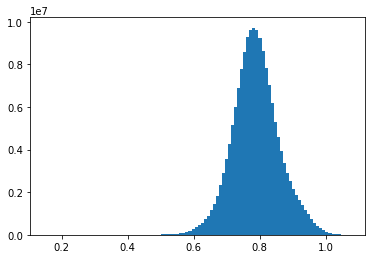

In [106]:
plt.hist(m_data.reshape(np.prod(m_data.shape)), bins=100)

(array([3.000000e+00, 5.000000e+00, 1.000000e+01, 1.800000e+01,
        2.900000e+01, 4.800000e+01, 5.700000e+01, 6.500000e+01,
        9.500000e+01, 1.750000e+02, 2.180000e+02, 1.990000e+02,
        1.950000e+02, 2.370000e+02, 3.260000e+02, 4.030000e+02,
        5.460000e+02, 6.880000e+02, 8.040000e+02, 4.460000e+02,
        3.130000e+02, 2.820000e+02, 2.880000e+02, 3.160000e+02,
        3.420000e+02, 3.010000e+02, 3.120000e+02, 3.180000e+02,
        3.210000e+02, 3.280000e+02, 3.410000e+02, 3.220000e+02,
        3.010000e+02, 2.890000e+02, 2.050000e+02, 1.860000e+02,
        1.830000e+02, 2.420000e+02, 1.980000e+02, 2.350000e+02,
        2.430000e+02, 2.760000e+02, 3.080000e+02, 3.380000e+02,
        3.730000e+02, 3.680000e+02, 4.060000e+02, 3.990000e+02,
        4.160000e+02, 4.560000e+02, 5.310000e+02, 5.880000e+02,
        5.010000e+02, 4.430000e+02, 4.730000e+02, 4.400000e+02,
        3.960000e+02, 4.420000e+02, 4.550000e+02, 4.850000e+02,
        4.370000e+02, 4.680000e+02, 4.50

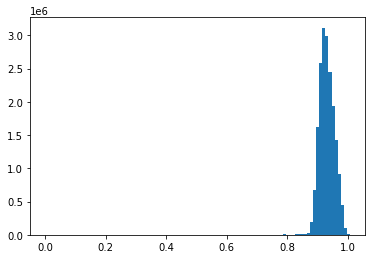

In [105]:
plt.hist(g_data.reshape(np.prod(g_data.shape)), bins=100)

# 2. GAN model test

In [104]:
def nnelu(input):
    return tf.add(tf.constant(1, dtype=tf.float32), tf.nn.elu(input))

high_input = tf.keras.Input(shape=(n_lag, task_dim[0], task_dim[1], 1))
x1 = tf.keras.layers.ConvLSTM2D(16, kernel_size=(3,3), return_sequences=True, activation=tf.keras.layers.LeakyReLU())(high_input)
x1 = tf.keras.layers.ConvLSTM2D(16, kernel_size=(3,3), return_sequences=True, activation=tf.keras.layers.LeakyReLU())(x1)
x1 = tf.keras.layers.ConvLSTM2D(16, kernel_size=(1,1), activation=tf.keras.layers.LeakyReLU())(x1)
x1 = tf.keras.layers.Flatten()(x1)

low_input = tf.keras.Input(shape=(n_lag, task_dim[0], task_dim[1], 1))
x2 = tf.keras.layers.ConvLSTM2D(16, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU())(low_input)
x2 = tf.keras.layers.Flatten()(x1)

ele_input = tf.keras.Input(shape=(task_dim[0], task_dim[1], 1))
x3 = tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU())(ele_input)
x3 = tf.keras.layers.Flatten()(x3)

other_input =  tf.keras.Input(shape=(3))
x4 = tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU())(other_input)

x = tf.keras.layers.Concatenate(axis=1)([x1, x2, x3, x4])
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(30, activation=tf.keras.layers.LeakyReLU())(x)
x = tf.keras.layers.Dense(n_pred*np.prod(task_dim), activation=nnelu)(x)
x = tf.keras.layers.Reshape([n_pred, task_dim[0], task_dim[1]])(x)
generator = tf.keras.Model([high_input, low_input, ele_input, other_input], x)
generator.compile(optimizer='adam', loss='mean_absolute_error')

In [105]:
generator.fit([X_high[:-1], X_low[:-1], X_ele[:-1], X_other[:-1]], Y[:-1], epochs=100)

Epoch 1/100
6/6 [==============================] - 12s 16ms/step - loss: 0.1867
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.1435
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 0.1132
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0977
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0825
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0711
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0630
Epoch 8/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0555
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0504
Epoch 10/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0432
Epoch 11/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0409
Epoch 12/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0358
Epoch 13/100
6/6 [==============================

In [109]:
pred_Y = generator.predict([X_high[-1:], X_low[-1:], X_ele[-1:], X_other[-1:]])

In [112]:
np.sqrt(np.mean(np.square(pred_Y[-1] - Y[-1])))

0.010288388300887755

In [100]:
from util_tools.data_processing import rsquared
rsquared(pred_Y[0, 0].reshape((25)), Y[0,0].reshape((25)))

(0.008515162367835552, 0.6608753429840621)

In [78]:
pred_input = tf.keras.Input(shape=(n_pred, task_dim[0], task_dim[1]))
y1 = tf.keras.layers.Flatten()(pred_input)
'''
condition_input = tf.keras.Input(shape=(3))
y2 = tf.keras.layers.Dense(8, activation='relu')(condition_input)
y = tf.keras.layers.Concatenate(axis=1)([y1, y2])
'''
y = tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU())(y1)
y = tf.keras.layers.Dropout(0.8)(y)
y = tf.keras.layers.Dense(1, activation='sigmoid')(y)
discriminator = tf.keras.Model([pred_input], y)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
reload(util_tools.cGAN_model)
from util_tools.cGAN_model import  Condition_GAN

In [80]:
cGAN = Condition_GAN(generator, discriminator)
cGAN.fit(20, 30, [X_high, X_low, X_ele, X_other], Y)

Epoch:1, batch:1/6, real_loss=1.581, fake_loss=0.634, g_loss=0.720
Epoch:1, batch:2/6, real_loss=2.333, fake_loss=0.666, g_loss=0.657
Epoch:1, batch:3/6, real_loss=0.591, fake_loss=0.600, g_loss=0.677
Epoch:1, batch:4/6, real_loss=1.211, fake_loss=0.720, g_loss=0.711
Epoch:1, batch:5/6, real_loss=0.957, fake_loss=0.657, g_loss=0.642
Epoch:1, batch:6/6, real_loss=1.126, fake_loss=0.806, g_loss=0.694
Epoch:2, batch:1/6, real_loss=0.959, fake_loss=0.756, g_loss=0.705
Epoch:2, batch:2/6, real_loss=2.761, fake_loss=0.704, g_loss=0.673
Epoch:2, batch:3/6, real_loss=1.737, fake_loss=0.568, g_loss=0.654
Epoch:2, batch:4/6, real_loss=1.243, fake_loss=0.695, g_loss=0.611
Epoch:2, batch:5/6, real_loss=1.803, fake_loss=0.713, g_loss=0.666
Epoch:2, batch:6/6, real_loss=1.845, fake_loss=0.598, g_loss=0.665
Epoch:3, batch:1/6, real_loss=1.941, fake_loss=0.697, g_loss=0.711
Epoch:3, batch:2/6, real_loss=0.579, fake_loss=0.704, g_loss=0.661
Epoch:3, batch:3/6, real_loss=1.478, fake_loss=0.692, g_loss=0

In [81]:
generator.predict([X_high[:3], X_low[:3], X_ele[:3], X_other[:3]])

array([[[[2.098398  , 6.8347626 , 0.        , 0.        , 7.251035  ],
         [0.        , 0.        , 1.2306697 , 5.5695524 , 2.0366979 ],
         [1.7452251 , 0.        , 0.39746153, 0.        , 0.        ],
         [0.        , 5.977245  , 2.5792408 , 2.9709916 , 0.        ],
         [0.        , 0.        , 4.167796  , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        , 0.        , 0.        ],
         [2.2004614 , 0.        , 0.        , 1.41692   , 1.7046547 ],
         [0.        , 0.        , 1.6035516 , 0.        , 0.        ],
         [0.18189768, 0.        , 1.1744812 , 3.1120594 , 0.        ],
         [1.6918491 , 4.8302684 , 0.        , 0.        , 0.4495553 ]]],


       [[[2.083576  , 6.7952433 , 0.        , 0.        , 7.212909  ],
         [0.        , 0.        , 1.2202346 , 5.539638  , 2.0282161 ],
         [1.7340379 , 0.        , 0.39515197, 0.        , 0.        ],
         [0.        , 5.9439816 , 2.565229  , 2.9511387 , 0.        ],


In [25]:
X = [X_high, X_low, X_ele, X_other]
j =0
batch_size=2
batch_X = [d[j*batch_size:(j+1)*batch_size] for d in X]

In [28]:
batch_X[0].shape

(2, 4, 5, 5, 1)

In [30]:
np.zeros((batch_size, 1), dtype='int')

array([[0],
       [0]])